In [1]:
import pandas as pd

In [2]:
data_directory = 'data/' + 'ut-zap50k-data/'

In [3]:
df_meta = pd.read_csv(data_directory + 'meta-data.csv')

In [4]:
df_meta.head()

CID Category SubCategory     HeelHeight                    Insole  \
0   100627-72    Shoes     Oxfords            NaN                   Leather   
1  100627-255    Shoes     Oxfords            NaN                   Leather   
2   100657-72    Shoes     Oxfords            NaN  Leather;Padded;Removable   
3  100657-216    Shoes     Oxfords            NaN  Leather;Padded;Removable   
4    101026-3    Boots    Mid-Calf  1in - 1 3/4in            Leather;Padded   

   Closure Gender        Material               ToeStyle  
0  Lace up    Men         Leather   Capped Toe;Round Toe  
1  Lace up    Men         Leather   Capped Toe;Round Toe  
2  Lace up    Men         Leather   Capped Toe;Round Toe  
3  Lace up    Men         Leather   Capped Toe;Round Toe  
4  Pull-on    Men  Leather;Rubber  Square Toe;Closed Toe

In [5]:
import mat4py

In [6]:
img_dirs = mat4py.loadmat(data_directory + 'image-path.mat')

In [7]:
img_dirs['imagepath'][3]

['Shoes/Oxfords/Bostonian/100657.216.jpg']

In [8]:
for listy in img_dirs['imagepath']:
    if len(listy) != 1:
        print('At least one list not of length 1')
        
#so these lists are all of length 1... and can be unfurled.

In [9]:
img_dirs = list(map(lambda x: x[0], img_dirs['imagepath']))

In [10]:
df = df_meta
df['img_path'] = img_dirs

In [11]:
df.head()

CID Category SubCategory     HeelHeight                    Insole  \
0   100627-72    Shoes     Oxfords            NaN                   Leather   
1  100627-255    Shoes     Oxfords            NaN                   Leather   
2   100657-72    Shoes     Oxfords            NaN  Leather;Padded;Removable   
3  100657-216    Shoes     Oxfords            NaN  Leather;Padded;Removable   
4    101026-3    Boots    Mid-Calf  1in - 1 3/4in            Leather;Padded   

   Closure Gender        Material               ToeStyle  \
0  Lace up    Men         Leather   Capped Toe;Round Toe   
1  Lace up    Men         Leather   Capped Toe;Round Toe   
2  Lace up    Men         Leather   Capped Toe;Round Toe   
3  Lace up    Men         Leather   Capped Toe;Round Toe   
4  Pull-on    Men  Leather;Rubber  Square Toe;Closed Toe   

                                 img_path  
0   Shoes/Oxfords/Bostonian/100627.72.jpg  
1  Shoes/Oxfords/Bostonian/100627.255.jpg  
2   Shoes/Oxfords/Bostonian/100657.72.jpg  
3  Shoes/Oxfords/Bostonian/100657.216.jpg  
4     Boots/Mid-Calf/Durango/101026.3.jpg

In [12]:
# :) :) :) :) 

def adhoc_corrections(string):
    string = string.replace('/T.U.K./', '/T.U.K/')
    string = string.replace('/Neil M./', '/Neil M/')
    string = string.replace('/Aquatalia by Marvin K./', '/Aquatalia by Marvin K/')
    string = string.replace("/Levi's Shoes/", "/Levi's&#174; Shoes/")
    string = string.replace("/Levi's Kids/", "/Levi's&#174; Kids/")
    string = string.replace('/W.A.G./', '/W.A.G/')
    string = string.replace('/L.A.M.B./', '/L.A.M.B/')



    return string

df['img_path'] = df['img_path'].apply(adhoc_corrections)


#filtering 
df = df[~df['img_path'].str.contains("/Pablosky Kids/")]

df[df['img_path'].str.contains('T.U.K')]

df = df.reset_index(drop=True)

df.head()

CID Category SubCategory     HeelHeight                    Insole  \
0   100627-72    Shoes     Oxfords            NaN                   Leather   
1  100627-255    Shoes     Oxfords            NaN                   Leather   
2   100657-72    Shoes     Oxfords            NaN  Leather;Padded;Removable   
3  100657-216    Shoes     Oxfords            NaN  Leather;Padded;Removable   
4    101026-3    Boots    Mid-Calf  1in - 1 3/4in            Leather;Padded   

   Closure Gender        Material               ToeStyle  \
0  Lace up    Men         Leather   Capped Toe;Round Toe   
1  Lace up    Men         Leather   Capped Toe;Round Toe   
2  Lace up    Men         Leather   Capped Toe;Round Toe   
3  Lace up    Men         Leather   Capped Toe;Round Toe   
4  Pull-on    Men  Leather;Rubber  Square Toe;Closed Toe   

                                 img_path  
0   Shoes/Oxfords/Bostonian/100627.72.jpg  
1  Shoes/Oxfords/Bostonian/100627.255.jpg  
2   Shoes/Oxfords/Bostonian/100657.72.jpg  
3  Shoes/Oxfords/Bostonian/100657.216.jpg  
4     Boots/Mid-Calf/Durango/101026.3.jpg

In [13]:
#ensure all images are scaled to 136x102
from PIL import Image

def resize_save_img(filename, origin='data/ut-zap50k-images/', save='data/zap50k-resized/', width=299, height=299):
    #resize file to 250x250 and stretch
    with open(origin + filename, 'r+b') as f:
        with Image.open(f) as img:
            new_img = img.resize((width,height))
            new_img = new_img.convert("RGB")
            new_img.save(save + filename, "JPEG", optimize=True)


In [14]:
#resize all images
#no need now that we're using ImageDataGenerator
#df['img_path'].apply(resize_save_img)

In [15]:
#use VGG-16 transfer learning network and euclidean distance to get k nearest neighbours.

df.head()

CID Category SubCategory     HeelHeight                    Insole  \
0   100627-72    Shoes     Oxfords            NaN                   Leather   
1  100627-255    Shoes     Oxfords            NaN                   Leather   
2   100657-72    Shoes     Oxfords            NaN  Leather;Padded;Removable   
3  100657-216    Shoes     Oxfords            NaN  Leather;Padded;Removable   
4    101026-3    Boots    Mid-Calf  1in - 1 3/4in            Leather;Padded   

   Closure Gender        Material               ToeStyle  \
0  Lace up    Men         Leather   Capped Toe;Round Toe   
1  Lace up    Men         Leather   Capped Toe;Round Toe   
2  Lace up    Men         Leather   Capped Toe;Round Toe   
3  Lace up    Men         Leather   Capped Toe;Round Toe   
4  Pull-on    Men  Leather;Rubber  Square Toe;Closed Toe   

                                 img_path  
0   Shoes/Oxfords/Bostonian/100627.72.jpg  
1  Shoes/Oxfords/Bostonian/100627.255.jpg  
2   Shoes/Oxfords/Bostonian/100657.72.jpg  
3  Shoes/Oxfords/Bostonian/100657.216.jpg  
4     Boots/Mid-Calf/Durango/101026.3.jpg

In [16]:
from keras.applications import inception_v3

def build_model():
  #initialise inception base model
    base_model=inception_v3.InceptionV3(weights='imagenet',include_top=False)
    return base_model


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
model = build_model()

In [18]:
from keras.preprocessing.image import ImageDataGenerator

rescaling_generator = ImageDataGenerator(rescale=1./255)

In [19]:
img_tgt_path = df['img_path'][4]
img_tgt_path

'Boots/Mid-Calf/Durango/101026.3.jpg'

In [20]:
#assume that images maintain the same order and use ImageDataGenerator.flow_from_dataframe!
#Users⁩ ▸ ⁨griggles⁩ ▸ ⁨Documents⁩ ▸ ⁨FLATIRON⁩ ▸ ⁨FINAL PROJECT⁩ ▸ ⁨Fashion⁩ ▸ ⁨ZAPPOS⁩ ▸ ⁨data⁩
from keras.preprocessing.image import ImageDataGenerator

img_directory = 'data/c/'
img_directory2 = '/Users/griggles/Documents/FLATIRON/FINAL PROJECT/Fashion/ZAPPOS/data/ut-zap50k-images'
img_generator = ImageDataGenerator(rescale=1./255).flow_from_dataframe(df, img_directory2, x_col='img_path', y_col='Category', has_ext=True, target_size=(299, 299), color_mode='rgb', batch_size=df.shape[0], shuffle=False)





Found 0 images belonging to 4 classes.


In [21]:
img_directory = 'data/ut-zap50k-images/'

img_tgt_path  = img_directory + img_tgt_path

In [22]:
import numpy as np
import PIL.Image

#import img...
array_img = np.asarray(PIL.Image.open(img_tgt_path))

scaled_array_img = (1./255) * array_img

x =PIL.Image.fromarray(array_img)

print(type(x))

<class 'PIL.Image.Image'>


In [23]:
output = model.predict(np.array([scaled_array_img]))

In [24]:
output_vectpr = output.flatten().shape

In [25]:
#see how close you can get these tho!

In [26]:
def img_path_to_z_array(img_path, directory):
    #import img...
    array_img = np.asarray(PIL.Image.open(directory + img_path))
    scaled_array_img = (1./255) * array_img
    return scaled_array_img
    

In [27]:
def distance_to_tgt(vector_tgt, vector_other):
    return np.linalg.norm(vector_tgt-vector_other)

In [28]:
def get_top_k_recs(k, img_path_tgt, img_paths,  model, directory='data/ut-zap50k-images/'):
    vector_tgt = model.predict(np.array([img_path_to_z_array(img_path_tgt, directory)]))
    top_k = []
    for index, img_path in img_paths.iteritems():
        print(img_path)
        vector_img = model.predict(np.array([img_path_to_z_array(img_path, directory)]))
        vector_dist = distance_to_tgt(vector_tgt, vector_img)
        if (len(top_k) < k):
            top_k.append((vector_dist, index))
        else:
              break
            
    return top_k
        

In [29]:
img_paths = df['img_path']

img_paths.index = df['CID']

top_3 = get_top_k_recs(3, df['img_path'][4], img_paths, model)

Shoes/Oxfords/Bostonian/100627.72.jpg
Shoes/Oxfords/Bostonian/100627.255.jpg
Shoes/Oxfords/Bostonian/100657.72.jpg
Shoes/Oxfords/Bostonian/100657.216.jpg


In [30]:
print(top_3)

[(64.19068, '100627-72'), (62.190228, '100627-255'), (64.90801, '100657-72')]


In [ ]:
#use PCA and use those dimensions to calculate euclidean distance? advantages/disadvantages? Not local

In [33]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
from IPython.display import display # to display images


def display_images(tgt_id, ids, img_paths, directory='data/ut-zap50k-images/'):
    tgt_img = PIL.Image.open(directory + img_paths[tgt_id])
    
    img_list = [tgt_img]
    
    for img_id in ids:
        img_list.append(PIL.Image.open(directory + img_paths[img_id]))
            
    for img in img_list:
        display(img)
    

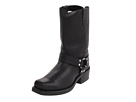

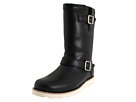

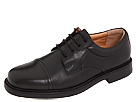

In [34]:
display_images('101026-3', ['7843267-72', '100657-72'], img_paths)

In [36]:
def get_top_k_recs_by_heap_imprv(k, img_path_tgt, img_paths,  model, directory='data/ut-zap50k-images/', verbose=False):
    vector_tgt = model.predict(np.array([img_path_to_z_array(img_path_tgt, directory)]))
    top_k = []
    count = 0
    for index, img_path in img_paths.iteritems():
        count += 1
    
        vector_img = model.predict(np.array([img_path_to_z_array(img_path, directory)]))
        vector_dist = distance_to_tgt(vector_tgt, vector_img)
        
        keep_top_k(k, top_k, (vector_dist, index))
        
        if(verbose):
            print(count)
            print(top_k)
        
    return top_k
        

In [37]:
def keep_top_k(k, top_k, challenger):
    if len(top_k) == 0:
        top_k.append(challenger)
        return top_k
    
    insert_index = -1
    for i in range (min(len(top_k), k) - 1, -1, -1):
        if top_k[i][0] > challenger[0]:
            insert_index = i
        else:
            break
    if insert_index >= 0:
        top_k.insert(insert_index, challenger)
    if len(top_k) > k:
        top_k = top_k.pop()
    return top_k

In [38]:
def grab_CID(pairs):
    return list(map(lambda x: x[1], pairs))

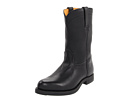

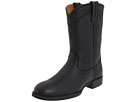

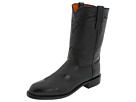

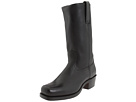

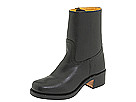

In [39]:
display_images('107684-109710', ['7138208-3', '7139912-3', '7192727-72', '101186-3'], img_paths)

In [40]:
def make_rec(cid, k=5, stock=5000, verbose=False):
    k = k+1
    recs = get_top_k_recs_by_heap_imprv(k, df['img_path'][cid], df['img_path'][:stock], model, verbose=verbose)
    cids = grab_CID(recs)
    display_images(cids[0], cids[1:], df['img_path'])

In [ ]:
make_rec('101026-3', 5, 1000, False)

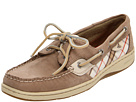

In [51]:
target_shoe = df['CID'][1001]

display_images(target_shoe, [], df['img_path'])

In [53]:
make_rec(target_shoe, 4, 30000, False)

KeyboardInterrupt: 

In [58]:
def squared_distance_to_tgt(vector_tgt, vector_other):
    return np.sum(np.square(vector_tgt-vector_other))

In [59]:
def get_top_k_recs_fast(k, img_path_tgt, img_paths,  model, directory='data/ut-zap50k-images/', verbose=False):
    vector_tgt = model.predict(np.array([img_path_to_z_array(img_path_tgt, directory)]))
    top_k = []
    count = 0
    for index, img_path in img_paths.iteritems():
        count += 1
    
        vector_img = model.predict(np.array([img_path_to_z_array(img_path, directory)]))
        vector_dist = squared_distance_to_tgt(vector_tgt, vector_img)
        
        keep_top_k(k, top_k, (vector_dist, index))
        
        if(verbose):
            print(count)
            print(top_k)
        
    return top_k

In [60]:
def make_rec_fast(cid, k=5, stock=5000, verbose=False):
    k = k+1
    recs = get_top_k_recs_fast(k, df['img_path'][cid], df['img_path'][:stock], model, verbose=verbose)
    cids = grab_CID(recs)
    display_images(cids[0], cids[1:], df['img_path'])

1
[(2446.0056, '100627-72')]
2
[(1813.4753, '100627-255'), (2446.0056, '100627-72')]
3
[(1813.4753, '100627-255'), (2140.615, '100657-72'), (2446.0056, '100627-72')]
4
[(1813.4753, '100627-255'), (1918.3943, '100657-216'), (2140.615, '100657-72'), (2446.0056, '100627-72')]
5
[(1813.4753, '100627-255'), (1918.3943, '100657-216'), (2140.615, '100657-72'), (2446.0056, '100627-72')]
6
[(1813.4753, '100627-255'), (1918.3943, '100657-216'), (2140.615, '100657-72'), (2446.0056, '100627-72')]
7
[(1813.4753, '100627-255'), (1918.3943, '100657-216'), (1946.708, '101093-316195'), (2140.615, '100657-72'), (2446.0056, '100627-72')]
8
[(1813.4753, '100627-255'), (1918.3943, '100657-216'), (1946.708, '101093-316195'), (2140.615, '100657-72'), (2446.0056, '100627-72')]
9
[(1813.4753, '100627-255'), (1918.3943, '100657-216'), (1946.708, '101093-316195'), (2140.615, '100657-72'), (2301.0518, '101093-342648')]
10
[(1813.4753, '100627-255'), (1918.3943, '100657-216'), (1946.708, '101093-316195'), (2140.61

65
[(1362.7839, '102121-287'), (1510.8981, '101430-84351'), (1570.0923, '101430-594'), (1616.6378, '101430-352'), (1622.554, '101404-231')]
66
[(1362.7839, '102121-287'), (1510.8981, '101430-84351'), (1570.0923, '101430-594'), (1616.6378, '101430-352'), (1622.554, '101404-231')]
67
[(1362.7839, '102121-287'), (1510.8981, '101430-84351'), (1570.0923, '101430-594'), (1616.6378, '101430-352'), (1622.554, '101404-231')]
68
[(1362.7839, '102121-287'), (1510.8981, '101430-84351'), (1570.0923, '101430-594'), (1616.6378, '101430-352'), (1622.554, '101404-231')]
69
[(1362.7839, '102121-287'), (1510.8981, '101430-84351'), (1570.0923, '101430-594'), (1616.6378, '101430-352'), (1622.554, '101404-231')]
70
[(1362.7839, '102121-287'), (1510.8981, '101430-84351'), (1570.0923, '101430-594'), (1616.6378, '101430-352'), (1622.554, '101404-231')]
71
[(1362.7839, '102121-287'), (1510.8981, '101430-84351'), (1570.0923, '101430-594'), (1616.6378, '101430-352'), (1622.554, '101404-231')]
72
[(1362.7839, '102

124
[(1362.7839, '102121-287'), (1510.8981, '101430-84351'), (1522.8572, '104677-324686'), (1570.0923, '101430-594'), (1616.6378, '101430-352')]
125
[(1362.7839, '102121-287'), (1510.8981, '101430-84351'), (1522.8572, '104677-324686'), (1570.0923, '101430-594'), (1616.6378, '101430-352')]
126
[(1362.7839, '102121-287'), (1510.8981, '101430-84351'), (1522.8572, '104677-324686'), (1570.0923, '101430-594'), (1616.6378, '101430-352')]
127
[(1362.7839, '102121-287'), (1510.8981, '101430-84351'), (1522.8572, '104677-324686'), (1570.0923, '101430-594'), (1616.6378, '101430-352')]
128
[(1362.7839, '102121-287'), (1510.8981, '101430-84351'), (1522.8572, '104677-324686'), (1570.0923, '101430-594'), (1616.6378, '101430-352')]
129
[(1362.7839, '102121-287'), (1510.8981, '101430-84351'), (1522.8572, '104677-324686'), (1570.0923, '101430-594'), (1616.6378, '101430-352')]
130
[(1362.7839, '102121-287'), (1510.8981, '101430-84351'), (1522.8572, '104677-324686'), (1570.0923, '101430-594'), (1616.6378, 

185
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1510.8981, '101430-84351'), (1522.8572, '104677-324686')]
186
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1510.8981, '101430-84351'), (1522.8572, '104677-324686')]
187
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1510.8981, '101430-84351'), (1522.8572, '104677-324686')]
188
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1510.8981, '101430-84351'), (1522.8572, '104677-324686')]
189
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1510.8981, '101430-84351'), (1522.8572, '104677-324686')]
190
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1510.8981, '101430-84351'), (1522.8572, '104677-324686')]
191
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1510.8981, '101430-84351'), (1522.85

246
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1510.8981, '101430-84351'), (1522.8572, '104677-324686')]
247
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1510.8981, '101430-84351'), (1522.8572, '104677-324686')]
248
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1510.8981, '101430-84351'), (1522.8572, '104677-324686')]
249
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1510.8981, '101430-84351'), (1522.8572, '104677-324686')]
250
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1510.8981, '101430-84351'), (1522.8572, '104677-324686')]
251
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1510.8981, '101430-84351'), (1522.8572, '104677-324686')]
252
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1510.8981, '101430-84351'), (1522.85

306
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
307
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
308
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
309
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
310
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
311
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
312
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-8

365
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
366
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
367
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
368
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
369
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
370
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
371
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-8

425
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
426
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
427
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
428
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
429
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
430
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
431
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-8

486
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
487
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
488
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
489
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
490
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
491
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
492
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-8

547
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
548
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
549
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
550
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
551
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
552
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
553
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-8

608
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
609
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
610
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
611
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
612
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
613
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
614
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-8

666
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
667
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
668
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
669
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
670
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
671
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
672
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-8

725
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
726
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
727
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
728
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
729
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
730
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
731
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-8

786
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
787
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
788
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
789
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
790
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
791
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
792
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-8

847
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
848
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
849
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
850
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
851
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
852
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
853
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-8

909
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
910
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
911
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
912
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
913
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
914
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-84351')]
915
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1510.8981, '101430-8

969
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1506.4841, '7158233-907')]
970
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1506.4841, '7158233-907')]
971
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1506.4841, '7158233-907')]
972
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1506.4841, '7158233-907')]
973
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1506.4841, '7158233-907')]
974
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1506.4841, '7158233-907')]
975
[(1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839'), (1506.4841, '7158233-907')]

1032
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1033
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1034
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1035
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1036
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1037
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1038
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1039
[(0.0, '

1091
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1092
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1093
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1094
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1095
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1096
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1097
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1098
[(0.0, '

1153
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1154
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1155
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1156
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1157
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1158
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1159
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1160
[(0.0, '

1213
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1214
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1215
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1216
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1217
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1218
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1219
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1220
[(0.0, '

1274
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1275
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1276
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1277
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1278
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1279
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1280
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1281
[(0.0, '

1337
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1338
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1339
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1340
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1341
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1342
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1343
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1344
[(0.0, '

1397
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1398
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1399
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1400
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1401
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1402
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1403
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1404
[(0.0, '

1460
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1461
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1462
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1463
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1464
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1465
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1466
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1467
[(0.0, '

1520
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1521
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1522
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1523
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1524
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1525
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1526
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1527
[(0.0, '

1581
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1582
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1583
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1584
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1585
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1586
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1587
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1362.7839, '102121-287'), (1368.8999, '105989-820'), (1499.4849, '109298-3839')]
1588
[(0.0, '

1644
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1645
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1646
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1647
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1648
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1649
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1650
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1651
[(0.0, '7161124

1703
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1704
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1705
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1706
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1707
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1708
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1709
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1710
[(0.0, '7161124

1765
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1766
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1767
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1768
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1769
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1770
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1771
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1772
[(0.0, '7161124

1828
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1829
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1830
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1831
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1832
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1833
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1834
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1835
[(0.0, '7161124

1890
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1891
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1892
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1893
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1894
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1895
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1896
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1897
[(0.0, '7161124

1950
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1951
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1952
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1953
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1954
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1955
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1956
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
1957
[(0.0, '7161124

2012
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2013
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2014
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2015
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2016
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2017
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2018
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2019
[(0.0, '7161124

2077
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2078
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2079
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2080
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2081
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2082
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2083
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2084
[(0.0, '7161124

2139
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2140
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2141
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2142
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2143
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2144
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2145
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2146
[(0.0, '7161124

2200
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2201
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2202
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2203
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2204
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2205
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2206
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2207
[(0.0, '7161124

2264
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2265
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2266
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2267
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2268
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2269
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2270
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2271
[(0.0, '7161124

2326
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2327
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2328
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2329
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2330
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2331
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2332
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2333
[(0.0, '7161124

2387
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2388
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2389
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2390
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2391
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2392
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2393
[(0.0, '7161124-352727'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20'), (1362.7839, '102121-287'), (1368.8999, '105989-820')]
2394
[(0.0, '7161124

2446
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2447
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2448
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2449
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2450
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2451
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2452
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

2505
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2506
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2507
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2508
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2509
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2510
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2511
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

2564
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2565
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2566
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2567
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2568
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2569
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2570
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

2624
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2625
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2626
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2627
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2628
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2629
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2630
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

2684
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2685
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2686
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2687
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2688
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2689
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2690
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

2744
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2745
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2746
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2747
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2748
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2749
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2750
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

2803
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2804
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2805
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2806
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2807
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2808
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2809
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

2865
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2866
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2867
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2868
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2869
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2870
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2871
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

2922
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2923
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2924
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2925
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2926
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2927
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2928
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

2979
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2980
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2981
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2982
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2983
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2984
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
2985
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

3038
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3039
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3040
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3041
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3042
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3043
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3044
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

3099
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3100
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3101
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3102
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3103
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3104
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3105
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

3156
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3157
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3158
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3159
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3160
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3161
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3162
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

3218
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3219
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3220
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3221
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3222
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3223
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3224
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

3279
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3280
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3281
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3282
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3283
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3284
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3285
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

3340
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3341
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3342
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3343
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3344
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3345
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3346
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

3400
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3401
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3402
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3403
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3404
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3405
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3406
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

3460
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3461
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3462
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3463
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3464
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3465
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3466
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

3520
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3521
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3522
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3523
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3524
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3525
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3526
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

3582
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3583
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3584
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3585
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3586
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3587
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3588
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

3640
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3641
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3642
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3643
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3644
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3645
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3646
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

3701
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3702
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3703
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3704
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3705
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3706
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3707
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

3758
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3759
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3760
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3761
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3762
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3763
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3764
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

3818
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3819
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3820
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3821
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3822
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3823
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3824
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

3877
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3878
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3879
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3880
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3881
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3882
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3883
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

3936
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3937
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3938
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3939
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3940
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3941
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3942
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

3995
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3996
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3997
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3998
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
3999
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4000
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4001
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

4055
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4056
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4057
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4058
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4059
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4060
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4061
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

4113
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4114
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4115
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4116
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4117
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4118
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4119
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

4173
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4174
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4175
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4176
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4177
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4178
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4179
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

4234
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4235
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4236
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4237
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4238
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4239
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4240
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

4293
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4294
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4295
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4296
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4297
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4298
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4299
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

4352
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4353
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4354
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4355
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4356
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4357
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4358
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

4414
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4415
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4416
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4417
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4418
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4419
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4420
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

4471
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4472
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4473
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4474
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4475
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4476
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4477
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

4531
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4532
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4533
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4534
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4535
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4536
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4537
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

4593
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4594
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4595
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4596
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4597
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4598
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4599
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

4651
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4652
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4653
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4654
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4655
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4656
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4657
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

4708
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4709
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4710
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4711
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4712
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4713
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4714
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

4765
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4766
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4767
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4768
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4769
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4770
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4771
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

4826
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4827
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4828
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4829
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4830
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4831
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4832
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

4884
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4885
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4886
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4887
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4888
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4889
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4890
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

4942
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4943
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4944
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4945
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4946
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4947
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
4948
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

4999
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5000
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5001
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5002
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5003
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5004
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5005
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

5057
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5058
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5059
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5060
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5061
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5062
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5063
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

5117
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5118
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5119
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5120
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5121
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5122
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5123
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

5177
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5178
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5179
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5180
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5181
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5182
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5183
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

5235
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5236
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5237
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5238
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5239
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5240
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5241
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

5296
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5297
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5298
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5299
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5300
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5301
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5302
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

5356
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5357
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5358
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5359
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5360
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5361
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5362
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

5413
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5414
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5415
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5416
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5417
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5418
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5419
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

5471
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5472
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5473
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5474
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5475
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5476
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5477
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

5530
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5531
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5532
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5533
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5534
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5535
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5536
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

5592
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5593
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5594
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5595
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5596
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5597
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5598
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

5652
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5653
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5654
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5655
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5656
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5657
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5658
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

5710
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5711
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5712
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5713
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5714
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5715
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5716
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

5768
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5769
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5770
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5771
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5772
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5773
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5774
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

5825
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5826
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5827
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5828
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5829
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5830
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5831
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

5884
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5885
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5886
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5887
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5888
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5889
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5890
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

5943
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5944
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5945
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5946
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5947
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5948
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
5949
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

6003
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6004
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6005
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6006
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6007
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6008
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6009
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

6064
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6065
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6066
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6067
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6068
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6069
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6070
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

6122
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6123
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6124
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6125
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6126
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6127
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6128
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

6182
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6183
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6184
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6185
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6186
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6187
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6188
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

6239
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6240
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6241
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6242
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6243
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6244
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6245
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

6297
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6298
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6299
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6300
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6301
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6302
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6303
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

6356
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6357
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6358
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6359
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6360
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6361
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6362
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

6417
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6418
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6419
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6420
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6421
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6422
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6423
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

6476
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6477
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6478
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6479
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6480
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6481
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6482
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

6535
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6536
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6537
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6538
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6539
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6540
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6541
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

6592
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6593
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6594
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6595
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6596
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6597
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6598
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

6650
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6651
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6652
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6653
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6654
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6655
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6656
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

6711
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6712
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6713
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6714
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6715
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6716
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6717
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

6768
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6769
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6770
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6771
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6772
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6773
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6774
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

6829
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6830
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6831
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6832
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6833
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6834
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6835
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

6890
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6891
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6892
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6893
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6894
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6895
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6896
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

6948
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6949
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6950
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6951
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6952
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6953
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
6954
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

7007
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
7008
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
7009
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
7010
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
7011
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
7012
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
7013
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

7067
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
7068
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
7069
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
7070
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
7071
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
7072
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
7073
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

7127
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
7128
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
7129
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
7130
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
7131
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
7132
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '7212450-20')]
7133
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1351.9375, '721245

7184
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7185
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7186
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7187
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7188
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7189
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7190
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

7244
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7245
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7246
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7247
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7248
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7249
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7250
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

7305
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7306
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7307
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7308
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7309
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7310
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7311
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

7363
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7364
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7365
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7366
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7367
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7368
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7369
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

7423
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7424
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7425
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7426
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7427
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7428
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7429
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

7482
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7483
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7484
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7485
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7486
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7487
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7488
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

7540
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7541
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7542
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7543
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7544
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7545
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7546
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

7601
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7602
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7603
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7604
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7605
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7606
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7607
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

7659
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7660
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7661
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7662
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7663
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7664
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7665
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

7717
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7718
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7719
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7720
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7721
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7722
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7723
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

7777
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7778
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7779
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7780
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7781
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7782
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7783
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

7834
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7835
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7836
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7837
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7838
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7839
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7840
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

7890
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7891
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7892
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7893
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7894
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7895
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7896
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

7948
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7949
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7950
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7951
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7952
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7953
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
7954
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

8004
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8005
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8006
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8007
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8008
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8009
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8010
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

8061
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8062
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8063
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8064
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8065
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8066
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8067
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

8121
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8122
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8123
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8124
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8125
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8126
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8127
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

8179
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8180
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8181
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8182
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8183
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8184
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8185
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

8235
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8236
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8237
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8238
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8239
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8240
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8241
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

8295
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8296
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8297
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8298
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8299
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8300
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8301
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

8353
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8354
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8355
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8356
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8357
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8358
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8359
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

8411
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8412
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8413
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8414
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8415
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8416
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8417
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

8469
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8470
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8471
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8472
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8473
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8474
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8475
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

8529
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8530
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8531
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8532
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8533
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8534
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8535
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

8591
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8592
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8593
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8594
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8595
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8596
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8597
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

8648
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8649
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8650
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8651
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8652
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8653
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8654
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

8708
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8709
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8710
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8711
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8712
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8713
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8714
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

8767
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8768
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8769
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8770
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8771
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8772
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8773
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

8824
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8825
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8826
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8827
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8828
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8829
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8830
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

8881
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8882
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8883
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8884
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8885
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8886
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8887
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

8939
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8940
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8941
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8942
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8943
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8944
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8945
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

8998
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
8999
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9000
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9001
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9002
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9003
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9004
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

9057
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9058
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9059
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9060
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9061
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9062
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9063
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

9115
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9116
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9117
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9118
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9119
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9120
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9121
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

9174
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9175
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9176
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9177
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9178
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9179
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9180
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

9235
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9236
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9237
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9238
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9239
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9240
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9241
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

9294
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9295
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9296
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9297
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9298
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9299
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9300
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

9351
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9352
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9353
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9354
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9355
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9356
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9357
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

9410
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9411
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9412
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9413
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9414
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9415
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9416
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

9471
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9472
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9473
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9474
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9475
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9476
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9477
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

9529
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9530
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9531
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9532
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9533
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9534
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9535
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

9588
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9589
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9590
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9591
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9592
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9593
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9594
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

9645
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9646
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9647
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9648
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9649
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9650
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9651
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

9701
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9702
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9703
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9704
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9705
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9706
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9707
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

9759
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9760
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9761
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9762
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9763
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9764
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9765
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

9817
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9818
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9819
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9820
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9821
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9822
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9823
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

9875
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9876
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9877
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9878
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9879
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9880
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9881
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

9938
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9939
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9940
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9941
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9942
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9943
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9944
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-201

9998
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
9999
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10000
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10001
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10002
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10003
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10004
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '10543

10055
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10056
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10057
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10058
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10059
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10060
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10061
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

10114
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10115
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10116
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10117
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10118
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10119
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10120
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

10171
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10172
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10173
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10174
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10175
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10176
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10177
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

10229
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10230
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10231
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10232
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10233
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10234
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10235
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

10288
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10289
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10290
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10291
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10292
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10293
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10294
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

10344
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10345
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10346
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10347
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10348
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10349
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10350
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

10405
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10406
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10407
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10408
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10409
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10410
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10411
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

10463
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10464
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10465
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10466
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10467
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10468
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10469
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

10522
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10523
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10524
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10525
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10526
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10527
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10528
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

10579
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10580
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10581
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10582
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10583
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10584
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10585
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

10637
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10638
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10639
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10640
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10641
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10642
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10643
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

10695
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10696
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10697
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10698
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10699
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10700
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10701
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

10755
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10756
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10757
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10758
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10759
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10760
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10761
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

10815
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10816
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10817
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10818
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10819
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10820
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10821
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

10874
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10875
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10876
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10877
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10878
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10879
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10880
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

10933
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10934
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10935
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10936
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10937
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10938
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10939
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

10990
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10991
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10992
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10993
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10994
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10995
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
10996
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

11050
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11051
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11052
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11053
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11054
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11055
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11056
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

11105
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11106
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11107
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11108
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11109
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11110
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11111
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

11163
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11164
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11165
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11166
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11167
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11168
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11169
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

11223
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11224
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11225
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11226
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11227
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11228
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11229
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

11283
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11284
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11285
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11286
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11287
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11288
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11289
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

11341
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11342
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11343
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11344
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11345
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11346
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11347
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

11399
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11400
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11401
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11402
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11403
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11404
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11405
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

11458
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11459
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11460
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11461
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11462
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11463
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11464
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

11517
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11518
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11519
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11520
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11521
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11522
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11523
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

11573
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11574
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11575
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11576
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11577
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11578
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11579
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

11630
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11631
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11632
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11633
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11634
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11635
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11636
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

11687
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11688
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11689
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11690
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11691
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11692
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11693
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

11747
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11748
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11749
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11750
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11751
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11752
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11753
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

11804
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11805
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11806
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11807
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11808
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11809
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11810
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

11862
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11863
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11864
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11865
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11866
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11867
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11868
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

11919
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11920
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11921
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11922
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11923
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11924
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11925
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

11979
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11980
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11981
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11982
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11983
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11984
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
11985
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

12036
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12037
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12038
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12039
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12040
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12041
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12042
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

12096
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12097
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12098
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12099
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12100
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12101
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12102
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

12156
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12157
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12158
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12159
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12160
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12161
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12162
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

12214
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12215
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12216
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12217
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12218
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12219
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12220
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

12272
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12273
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12274
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12275
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12276
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12277
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12278
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

12332
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12333
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12334
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12335
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12336
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12337
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12338
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

12390
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12391
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12392
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12393
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12394
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12395
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12396
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

12449
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12450
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12451
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12452
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12453
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12454
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12455
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

12507
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12508
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12509
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12510
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12511
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12512
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12513
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

12566
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12567
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12568
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12569
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12570
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12571
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12572
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

12627
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12628
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12629
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12630
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12631
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12632
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12633
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

12687
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12688
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12689
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12690
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12691
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12692
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12693
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

12746
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12747
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12748
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12749
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12750
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12751
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12752
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

12802
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12803
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12804
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12805
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12806
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12807
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12808
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

12862
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12863
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12864
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12865
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12866
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12867
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12868
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

12920
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12921
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12922
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12923
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12924
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12925
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12926
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

12980
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12981
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12982
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12983
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12984
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12985
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
12986
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

13038
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13039
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13040
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13041
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13042
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13043
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13044
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

13094
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13095
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13096
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13097
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13098
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13099
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13100
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

13152
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13153
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13154
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13155
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13156
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13157
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13158
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

13207
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13208
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13209
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13210
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13211
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13212
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13213
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

13264
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13265
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13266
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13267
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13268
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13269
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13270
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

13322
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13323
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13324
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13325
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13326
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13327
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13328
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

13380
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13381
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13382
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13383
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13384
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13385
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13386
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

13440
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13441
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13442
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13443
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13444
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13445
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13446
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

13500
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13501
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13502
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13503
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13504
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13505
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13506
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

13557
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13558
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13559
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13560
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13561
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13562
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13563
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

13616
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13617
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13618
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13619
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13620
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13621
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13622
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

13676
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13677
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13678
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13679
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13680
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13681
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13682
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

13736
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13737
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13738
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13739
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13740
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13741
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13742
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

13792
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13793
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13794
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13795
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13796
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13797
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13798
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

13850
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13851
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13852
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13853
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13854
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13855
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13856
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

13908
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13909
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13910
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13911
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13912
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13913
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13914
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

13963
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13964
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13965
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13966
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13967
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13968
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
13969
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

14022
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14023
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14024
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14025
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14026
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14027
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14028
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

14082
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14083
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14084
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14085
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14086
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14087
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14088
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

14140
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14141
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14142
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14143
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14144
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14145
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14146
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

14195
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14196
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14197
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14198
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14199
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14200
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14201
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

14252
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14253
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14254
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14255
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14256
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14257
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14258
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

14307
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14308
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14309
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14310
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14311
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14312
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14313
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

14365
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14366
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14367
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14368
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14369
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14370
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14371
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

14421
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14422
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14423
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14424
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14425
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14426
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14427
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

14477
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14478
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14479
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14480
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14481
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14482
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14483
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

14537
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14538
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14539
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14540
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14541
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14542
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14543
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

14592
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14593
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14594
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14595
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14596
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14597
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14598
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

14652
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14653
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14654
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14655
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14656
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14657
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14658
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

14710
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14711
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14712
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14713
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14714
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14715
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14716
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

14771
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14772
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14773
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14774
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14775
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14776
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14777
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

14830
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14831
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14832
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14833
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14834
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14835
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1311.4257, '7599417-263303')]
14836
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105

14886
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
14887
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
14888
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
14889
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
14890
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
14891
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
14892
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

14945
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
14946
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
14947
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
14948
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
14949
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
14950
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
14951
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

15004
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15005
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15006
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15007
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15008
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15009
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15010
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

15061
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15062
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15063
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15064
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15065
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15066
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15067
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

15121
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15122
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15123
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15124
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15125
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15126
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15127
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

15181
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15182
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15183
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15184
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15185
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15186
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15187
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

15239
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15240
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15241
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15242
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15243
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15244
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15245
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

15299
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15300
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15301
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15302
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15303
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15304
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15305
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

15362
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15363
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15364
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15365
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15366
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15367
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15368
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

15421
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15422
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15423
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15424
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15425
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15426
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15427
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

15481
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15482
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15483
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15484
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15485
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15486
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15487
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

15543
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15544
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15545
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15546
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15547
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15548
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15549
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

15604
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15605
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15606
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15607
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15608
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15609
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15610
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

15664
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15665
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15666
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15667
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15668
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15669
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15670
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

15724
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15725
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15726
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15727
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15728
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15729
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15730
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

15783
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15784
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15785
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15786
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15787
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15788
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15789
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

15840
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15841
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15842
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15843
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15844
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15845
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15846
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

15900
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15901
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15902
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15903
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15904
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15905
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15906
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

15958
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15959
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15960
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15961
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15962
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15963
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
15964
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

16016
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16017
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16018
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16019
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16020
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16021
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16022
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

16079
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16080
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16081
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16082
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16083
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16084
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16085
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

16137
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16138
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16139
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16140
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16141
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16142
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16143
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

16194
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16195
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16196
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16197
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16198
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16199
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16200
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

16251
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16252
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16253
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16254
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16255
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16256
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16257
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

16310
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16311
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16312
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16313
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16314
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16315
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16316
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

16371
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16372
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16373
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16374
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16375
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16376
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16377
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

16432
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16433
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16434
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16435
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16436
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16437
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16438
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

16490
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16491
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16492
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16493
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16494
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16495
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16496
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

16547
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16548
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16549
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16550
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16551
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16552
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16553
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

16604
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16605
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16606
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16607
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16608
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16609
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16610
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

16662
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16663
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16664
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16665
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16666
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16667
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16668
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

16723
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16724
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16725
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16726
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16727
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16728
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16729
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

16784
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16785
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16786
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16787
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16788
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16789
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16790
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

16844
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16845
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16846
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16847
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16848
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16849
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16850
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

16903
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16904
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16905
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16906
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16907
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16908
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16909
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

16960
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16961
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16962
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16963
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16964
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16965
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
16966
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

17019
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17020
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17021
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17022
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17023
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17024
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17025
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

17078
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17079
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17080
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17081
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17082
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17083
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17084
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

17136
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17137
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17138
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17139
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17140
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17141
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17142
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

17197
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17198
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17199
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17200
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17201
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17202
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17203
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

17256
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17257
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17258
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17259
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17260
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17261
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17262
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

17314
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17315
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17316
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17317
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17318
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17319
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17320
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

17372
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17373
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17374
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17375
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17376
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17377
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17378
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

17430
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17431
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17432
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17433
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17434
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17435
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17436
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

17491
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17492
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17493
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17494
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17495
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17496
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17497
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

17551
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17552
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17553
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17554
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17555
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17556
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17557
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

17614
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17615
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17616
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17617
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17618
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17619
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17620
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

17673
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17674
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17675
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17676
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17677
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17678
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17679
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

17732
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17733
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17734
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17735
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17736
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17737
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17738
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

17790
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17791
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17792
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17793
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17794
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17795
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17796
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

17847
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17848
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17849
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17850
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17851
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17852
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17853
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

17906
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17907
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17908
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17909
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17910
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17911
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17912
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

17968
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17969
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17970
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17971
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17972
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17973
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
17974
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

18028
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18029
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18030
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18031
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18032
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18033
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18034
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

18087
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18088
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18089
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18090
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18091
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18092
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18093
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

18145
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18146
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18147
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18148
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18149
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18150
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18151
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

18207
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18208
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18209
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18210
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18211
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18212
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18213
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

18269
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18270
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18271
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18272
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18273
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18274
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18275
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

18328
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18329
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18330
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18331
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18332
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18333
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18334
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

18390
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18391
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18392
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18393
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18394
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18395
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18396
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

18448
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18449
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18450
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18451
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18452
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18453
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18454
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

18508
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18509
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18510
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18511
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18512
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18513
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18514
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

18567
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18568
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18569
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18570
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18571
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18572
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18573
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

18626
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18627
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18628
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18629
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18630
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18631
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18632
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

18684
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18685
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18686
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18687
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18688
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18689
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18690
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

18741
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18742
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18743
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18744
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18745
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18746
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18747
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

18801
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18802
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18803
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18804
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18805
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18806
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18807
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

18863
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18864
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18865
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18866
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18867
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18868
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18869
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

18925
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18926
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18927
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18928
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18929
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18930
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18931
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

18985
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18986
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18987
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18988
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18989
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18990
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
18991
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

19043
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
19044
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
19045
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
19046
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
19047
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
19048
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
19049
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

19101
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
19102
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
19103
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
19104
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
19105
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
19106
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.8499, '7827311-559')]
19107
[(0.0, '7161124-352727'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016'), (1309.

19162
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19163
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19164
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19165
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19166
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19167
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19168
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

19221
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19222
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19223
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19224
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19225
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19226
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19227
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

19282
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19283
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19284
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19285
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19286
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19287
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19288
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

19341
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19342
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19343
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19344
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19345
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19346
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19347
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

19402
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19403
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19404
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19405
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19406
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19407
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19408
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

19464
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19465
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19466
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19467
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19468
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19469
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19470
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

19521
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19522
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19523
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19524
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19525
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19526
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19527
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

19578
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19579
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19580
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19581
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19582
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19583
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19584
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

19638
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19639
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19640
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19641
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19642
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19643
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19644
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

19696
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19697
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19698
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19699
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19700
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19701
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19702
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

19756
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19757
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19758
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19759
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19760
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19761
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19762
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

19816
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19817
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19818
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19819
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19820
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19821
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19822
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

19874
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19875
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19876
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19877
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19878
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19879
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19880
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

19933
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19934
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19935
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19936
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19937
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19938
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19939
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

19995
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19996
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19997
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19998
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
19999
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20000
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20001
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

20053
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20054
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20055
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20056
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20057
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20058
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20059
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

20111
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20112
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20113
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20114
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20115
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20116
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20117
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

20171
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20172
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20173
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20174
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20175
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20176
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20177
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

20230
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20231
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20232
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20233
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20234
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20235
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20236
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

20291
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20292
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20293
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20294
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20295
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20296
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20297
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

20352
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20353
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20354
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20355
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20356
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20357
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20358
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

20412
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20413
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20414
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20415
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20416
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20417
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20418
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

20474
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20475
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20476
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20477
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20478
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20479
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20480
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

20534
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20535
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20536
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20537
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20538
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20539
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20540
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

20593
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20594
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20595
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20596
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20597
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20598
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20599
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

20652
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20653
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20654
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20655
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20656
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20657
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20658
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

20714
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20715
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20716
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20717
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20718
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20719
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20720
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

20774
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20775
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20776
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20777
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20778
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20779
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20780
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

20833
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20834
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20835
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20836
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20837
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20838
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20839
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

20892
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20893
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20894
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20895
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20896
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20897
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20898
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

20954
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20955
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20956
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20957
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20958
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20959
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
20960
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

21013
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21014
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21015
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21016
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21017
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21018
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21019
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

21073
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21074
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21075
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21076
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21077
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21078
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21079
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

21133
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21134
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21135
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21136
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21137
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21138
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21139
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

21194
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21195
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21196
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21197
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21198
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21199
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21200
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

21252
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21253
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21254
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21255
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21256
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21257
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21258
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

21312
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21313
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21314
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21315
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21316
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21317
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21318
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

21372
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21373
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21374
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21375
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21376
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21377
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21378
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

21431
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21432
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21433
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21434
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21435
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21436
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21437
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

21490
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21491
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21492
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21493
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21494
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21495
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21496
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

21552
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21553
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21554
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21555
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21556
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21557
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21558
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

21614
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21615
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21616
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21617
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21618
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21619
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21620
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

21675
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21676
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21677
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21678
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21679
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21680
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21681
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

21734
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21735
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21736
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21737
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21738
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21739
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21740
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

21793
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21794
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21795
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21796
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21797
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21798
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21799
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

21852
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21853
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21854
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21855
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21856
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21857
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21858
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

21911
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21912
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21913
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21914
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21915
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21916
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21917
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

21971
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21972
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21973
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21974
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21975
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21976
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
21977
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

22031
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22032
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22033
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22034
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22035
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22036
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22037
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

22092
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22093
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22094
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22095
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22096
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22097
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22098
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

22152
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22153
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22154
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22155
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22156
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22157
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22158
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

22210
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22211
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22212
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22213
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22214
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22215
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22216
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

22270
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22271
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22272
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22273
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22274
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22275
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22276
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

22329
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22330
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22331
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22332
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22333
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22334
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22335
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

22389
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22390
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22391
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22392
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22393
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22394
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22395
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

22449
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22450
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22451
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22452
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22453
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22454
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22455
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

22511
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22512
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22513
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22514
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22515
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22516
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22517
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

22572
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22573
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22574
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22575
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22576
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22577
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22578
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22634
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22635
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22636
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22637
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22638
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22639
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, 

22691
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22692
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22693
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22694
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22695
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22696
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22697
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

22748
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22749
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22750
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22751
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22752
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22753
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22754
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

22809
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22810
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22811
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22812
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22813
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22814
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22815
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

22867
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22868
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22869
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22870
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22871
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22872
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22873
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

22926
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22927
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22928
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22929
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22930
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22931
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22932
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

22985
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22986
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22987
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22988
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22989
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22990
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
22991
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

23043
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23044
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23045
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23046
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23047
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23048
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23049
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

23100
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23101
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23102
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23103
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23104
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23105
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23106
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

23159
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23160
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23161
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23162
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23163
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23164
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23165
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

23217
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23218
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23219
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23220
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23221
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23222
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23223
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

23275
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23276
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23277
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23278
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23279
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23280
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23281
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

23335
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23336
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23337
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23338
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23339
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23340
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23341
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

23394
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23395
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23396
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23397
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23398
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23399
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23400
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

23452
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23453
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23454
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23455
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23456
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23457
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23458
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

23509
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23510
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23511
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23512
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23513
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23514
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23515
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

23568
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23569
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23570
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23571
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23572
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23573
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23574
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

23630
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23631
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23632
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23633
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23634
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23635
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23636
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

23690
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23691
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23692
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23693
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23694
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23695
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23696
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

23750
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23751
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23752
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23753
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23754
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23755
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23756
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

23809
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23810
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23811
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23812
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23813
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23814
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23815
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

23872
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23873
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23874
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23875
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23876
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23877
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23878
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

23933
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23934
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23935
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23936
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23937
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23938
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23939
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

23991
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23992
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23993
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23994
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23995
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23996
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
23997
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

24049
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24050
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24051
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24052
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24053
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24054
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24055
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

24107
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24108
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24109
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24110
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24111
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24112
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24113
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

24166
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24167
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24168
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24169
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24170
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24171
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24172
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

24226
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24227
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24228
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24229
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24230
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24231
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24232
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

24286
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24287
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24288
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24289
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24290
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24291
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24292
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

24346
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24347
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24348
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24349
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24350
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24351
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24352
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

24407
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24408
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24409
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24410
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24411
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24412
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24413
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

24468
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24469
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24470
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24471
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24472
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24473
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24474
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

24526
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24527
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24528
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24529
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24530
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24531
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24532
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

24584
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24585
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24586
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24587
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24588
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24589
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24590
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

24645
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24646
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24647
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24648
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24649
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24650
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24651
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

24704
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24705
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24706
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24707
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24708
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24709
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24710
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

24766
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24767
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24768
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24769
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24770
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24771
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24772
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

24827
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24828
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24829
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24830
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24831
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24832
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24833
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

24887
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24888
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24889
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24890
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24891
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24892
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24893
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

24947
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24948
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24949
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24950
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24951
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24952
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
24953
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

25008
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25009
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25010
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25011
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25012
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25013
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25014
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

25067
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25068
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25069
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25070
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25071
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25072
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25073
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25128
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25129
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25130
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25131
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25132
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25133
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, 

25187
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25188
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25189
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25190
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25191
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25192
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25193
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

25246
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25247
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25248
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25249
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25250
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25251
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25252
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

25307
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25308
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25309
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25310
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25311
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25312
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25313
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

25366
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25367
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25368
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25369
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25370
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25371
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25372
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

25425
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25426
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25427
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25428
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25429
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25430
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25431
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

25484
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25485
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25486
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25487
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25488
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25489
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25490
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

25544
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25545
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25546
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25547
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25548
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25549
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25550
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

25604
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25605
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25606
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25607
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25608
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25609
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25610
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

25665
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25666
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25667
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25668
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25669
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25670
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25671
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

25722
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25723
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25724
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25725
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25726
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25727
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25728
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

25780
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25781
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25782
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25783
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25784
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25785
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25786
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

25838
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25839
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25840
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25841
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25842
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25843
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25844
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

25895
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25896
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25897
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25898
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25899
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25900
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25901
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

25953
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25954
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25955
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25956
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25957
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25958
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
25959
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

26013
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26014
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26015
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26016
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26017
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26018
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26019
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

26070
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26071
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26072
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26073
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26074
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26075
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26076
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

26128
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26129
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26130
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26131
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26132
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26133
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26134
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

26191
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26192
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26193
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26194
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26195
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26196
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26197
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

26251
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26252
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26253
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26254
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26255
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26256
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26257
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

26309
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26310
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26311
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26312
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26313
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26314
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26315
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

26369
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26370
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26371
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26372
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26373
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26374
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26375
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

26431
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26432
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26433
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26434
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26435
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26436
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26437
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

26493
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26494
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26495
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26496
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26497
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26498
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26499
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

26554
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26555
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26556
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26557
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26558
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26559
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26560
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

26613
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26614
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26615
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26616
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26617
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26618
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26619
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

26672
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26673
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26674
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26675
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26676
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26677
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26678
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

26732
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26733
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26734
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26735
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26736
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26737
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26738
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

26794
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26795
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26796
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26797
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26798
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26799
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26800
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

26854
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26855
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26856
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26857
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26858
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26859
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26860
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

26913
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26914
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26915
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26916
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26917
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26918
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26919
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

26972
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26973
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26974
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26975
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26976
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26977
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
26978
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

27033
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27034
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27035
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27036
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27037
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27038
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27039
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

27091
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27092
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27093
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27094
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27095
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27096
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27097
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

27150
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27151
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27152
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27153
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27154
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27155
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27156
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

27209
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27210
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27211
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27212
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27213
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27214
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27215
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

27269
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27270
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27271
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27272
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27273
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27274
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27275
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

27327
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27328
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27329
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27330
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27331
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27332
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27333
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

27386
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27387
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27388
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27389
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27390
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27391
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27392
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

27445
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27446
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27447
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27448
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27449
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27450
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27451
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

27504
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27505
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27506
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27507
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27508
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27509
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27510
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

27562
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27563
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27564
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27565
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27566
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27567
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27568
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

27620
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27621
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27622
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27623
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27624
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27625
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27626
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

27678
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27679
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27680
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27681
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27682
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27683
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27684
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

27736
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27737
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27738
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27739
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27740
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27741
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27742
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

27797
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27798
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27799
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27800
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27801
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27802
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27803
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

27858
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27859
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27860
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27861
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27862
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27863
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27864
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

27920
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27921
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27922
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27923
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27924
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27925
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27926
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

27981
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27982
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27983
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27984
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27985
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27986
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
27987
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

28039
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28040
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28041
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28042
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28043
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28044
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28045
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

28099
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28100
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28101
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28102
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28103
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28104
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28105
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

28159
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28160
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28161
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28162
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28163
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28164
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28165
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

28220
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28221
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28222
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28223
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28224
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28225
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28226
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

28282
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28283
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28284
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28285
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28286
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28287
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28288
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

28341
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28342
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28343
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28344
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28345
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28346
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28347
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

28401
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28402
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28403
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28404
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28405
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28406
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28407
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

28461
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28462
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28463
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28464
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28465
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28466
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28467
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

28523
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28524
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28525
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28526
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28527
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28528
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28529
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

28582
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28583
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28584
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28585
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28586
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28587
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28588
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

28643
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28644
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28645
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28646
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28647
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28648
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28649
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

28701
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28702
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28703
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28704
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28705
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28706
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28707
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

28761
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28762
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28763
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28764
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28765
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28766
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28767
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

28818
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28819
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28820
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28821
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28822
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28823
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28824
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

28876
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28877
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28878
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28879
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28880
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28881
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28882
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

28934
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28935
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28936
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28937
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28938
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28939
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28940
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

28992
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28993
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28994
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28995
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28996
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28997
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
28998
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

29056
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29057
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29058
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29059
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29060
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29061
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29062
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

29118
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29119
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29120
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29121
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29122
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29123
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29124
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

29177
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29178
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29179
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29180
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29181
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29182
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29183
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

29236
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29237
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29238
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29239
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29240
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29241
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29242
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

29293
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29294
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29295
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29296
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29297
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29298
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29299
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

29354
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29355
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29356
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29357
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29358
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29359
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29360
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

29411
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29412
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29413
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29414
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29415
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29416
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29417
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

29470
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29471
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29472
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29473
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29474
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29475
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29476
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

29530
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29531
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29532
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29533
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29534
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29535
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29536
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

29590
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29591
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29592
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29593
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29594
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29595
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29596
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

29649
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29650
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29651
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29652
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29653
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29654
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29655
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

29709
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29710
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29711
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29712
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29713
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29714
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29715
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

29770
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29771
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29772
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29773
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29774
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29775
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29776
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

29832
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29833
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29834
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29835
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29836
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29837
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29838
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

29895
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29896
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29897
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29898
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29899
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29900
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29901
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

29953
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29954
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29955
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29956
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29957
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29958
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.5574, '105436-2016')]
29959
[(0.0, '7161124-352727'), (1200.5917, '7895855-263'), (1249.6322, '7271610-193336'), (1258.2307, '7271610-11'), (1286.

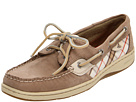

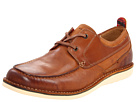

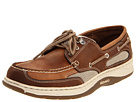

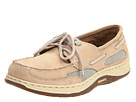

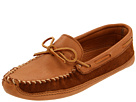

In [61]:
make_rec_fast(target_shoe, 4, 30000, True)